# Wrangle and Analyze Data Project
**by Ha Phuong Thao**

*This project is a part of [Data Analyst Nanodegree](https://udacity.com/course/data-analyst-nanodegree--nd002?v=a4) of Udacity.*

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](http://knowyourmeme.com/memes/theyre-good-dogs-brent). WeRateDogs has over 4 million followers and has received international media coverage.

### Project Details

* Data wrangling, which consists of:
    * Gathering data
    * Assessing data
    * Cleaning data
* Storing, analyzing, and visualizing your wrangled data
* Reporting on 1) data wrangling efforts and 2) data analyses and visualizations

## Gather

In [1]:
import requests
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
import re
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
# read WeRateDogs Twitter archive as data frame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# download tweet image predictions programmatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
# read image_prediction file as Pandas DataFrame
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
#Twitter API keys, secrets, and tokens
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [6]:
# reading json from a file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in twitter_archive.tweet_id:
        try:
            tweet_status = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            json.dump(tweet_status._json, outfile)
            outfile.write('\n')
        except:
            continue                

Rate limit reached. Sleeping for: 114
Rate limit reached. Sleeping for: 434


In [7]:
# list of dictionary to build a DataFrame of counted retweets and favorites 
df_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        retweets = tweet['retweet_count']
        favorites = tweet['favorite_count']
        # append list to dictionary
        df_list.append({'tweet_id': tweet_id,
                    'retweet_count': retweets,
                    'favorite_count': favorites})
        
tweet_data = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_data.sample(5)

,tweet_id,retweet_count,favorite_count
1382,700029284593901568,636,2215
397,823719002937630720,12605,0
567,800855607700029440,1840,0
2221,668221241640230912,209,525
708,783466772167098368,2539,9264


## Assess

In [8]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 20)

In [9]:
# display the twitter_achived table
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [10]:
# display the image_predictions table
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
# display the tweet data table
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8604,38847
1,892177421306343426,6320,33273
2,891815181378084864,4194,25073
3,891689557279858688,8718,42232
4,891327558926688256,9488,40369
5,891087950875897856,3138,20246
6,890971913173991426,2091,11867
7,890729181411237888,19075,65637
8,890609185150312448,4306,27803
9,890240255349198849,7481,31987


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [14]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null object
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 45.8+ KB


In [15]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
tweet_data.describe()

,retweet_count,favorite_count
count,2345.000000,2345.000000
mean,3029.804691,8076.619616
std,5039.776007,12151.113237
min,0.000000,0.000000
25%,607.000000,1406.000000
50%,1415.000000,3542.000000
75%,3530.000000,9983.000000
max,77457.000000,143537.000000


In [18]:
len(twitter_archive[twitter_archive['tweet_id'].duplicated()])

0

In [19]:
len(tweet_data[tweet_data['tweet_id'].duplicated()])

0

In [20]:
len(image_predictions[image_predictions['tweet_id'].duplicated()])

0

In [21]:
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [22]:
twitter_archive.name.value_counts()

None          745
a             55 
Charlie       12 
Cooper        11 
Lucy          11 
Oliver        11 
Lola          10 
Penny         10 
Tucker        10 
Winston       9  
             ..  
Lacy          1  
Franq         1  
Berkeley      1  
Cal           1  
Mike          1  
Tuco          1  
Ralphy        1  
Brandonald    1  
Flurpson      1  
Emma          1  
Name: name, Length: 957, dtype: int64

In [23]:
twitter_archive.loc[(twitter_archive.name.str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

In [24]:
twitter_archive[twitter_archive.name.str.islower()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [25]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
        .. 
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, Length: 40, dtype: int64

In [26]:
tweet_col = ['tweet_id','text','rating_numerator','rating_denominator','name']
twitter_archive[twitter_archive['rating_numerator']==1][tweet_col]

,tweet_id,text,rating_numerator,rating_denominator,name
605,798576900688019456,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10,None
1446,696490539101908992,After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,1,10,None
1869,675153376133427200,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,1,10,None
1940,673716320723169284,The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,1,10,None
2038,671550332464455680,After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,1,10,None
2091,670783437142401025,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,1,10,None
2261,667549055577362432,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,1,10,None
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2,an
2338,666104133288665088,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,1,10,None


In [27]:
twitter_archive.loc[twitter_archive.rating_numerator > 14][tweet_col]

,tweet_id,text,rating_numerator,rating_denominator,name
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10,None
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10,None
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10,None
285,838916489579200512,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,15,10,None
290,838150277551247360,@markhoppus 182/10,182,10,None
291,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15,10,None
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,None
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10,Logan
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam


In [28]:
twitter_archive.loc[twitter_archive.rating_numerator < 10][tweet_col]

,tweet_id,text,rating_numerator,rating_denominator,name
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10,Bella
229,848212111729840128,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10,Jerry
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10,None
387,826598799820865537,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,10,None
462,817502432452313088,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,7,10,Herschel
485,814578408554463233,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,9,10,Beau
599,798682547630837760,RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,8,10,None
605,798576900688019456,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10,None
730,781661882474196992,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5,10,None
745,780092040432480260,RT @dog_rates: This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit the shit Hank damn https://t.c…,8,10,Hank


In [29]:
twitter_archive['rating_denominator'].sort_values()

313     0  
2335    2  
516     7  
1576    10 
1575    10 
1574    10 
1573    10 
1572    10 
1563    10 
1570    10 
        .. 
1274    50 
433     70 
1843    80 
1254    80 
1228    90 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [30]:
twitter_archive.loc[twitter_archive.rating_denominator != 10][tweet_col]

,tweet_id,text,rating_numerator,rating_denominator,name
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,None
342,832088576586297345,@docmisterio account started on 11/15/15,11,15,None
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11,None
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,None
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,this
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,None
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert


In [31]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [32]:
image_predictions['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
chow                  44 
Samoyed               43 
toy_poodle            39 
Pomeranian            38 
cocker_spaniel        30 
                      .. 
swab                  1  
bald_eagle            1  
handkerchief          1  
stove                 1  
quilt                 1  
sliding_door          1  
beach_wagon           1  
slug                  1  
crane                 1  
pencil_box            1  
Name: p1, Length: 378, dtype: int64

#### Quality
##### `twitter_archive` table
- errorneous data type 
    - *timestamp, retweeted_status_timestamp*
    - *tweet_id, retweeted_status_id, retweeted_status_user_id*
    - *retweet_count, favorite_count*
- Tweet data contains unoriginal tweets such as retweets and replying tweets.
- Tweets have no images.
- Tweets have unappropriate sources.
- Null values represented as non-null (None) values in *name* and *dog stage* columns.
- *Name* column contain missing/ misslabelled names of dog.
- Missing/ misspelled name of dog where it could be extracted from *text* column.
- Numerators in decimal numbers are extracted incorrectly.
- Numerators and denominators extracted inaccurately where *text* record has more than one fractions.

##### `image_predictions` table
- errorneous data type: *tweet_id*
- missing records (2356 instead of 2075)

##### `tweet_data` table
- missing records (2345 instead of 2356)


#### Tidiness
- four columns represent one variable dog stages (doggo, floofer, pupper, puppo) in `twitter_archive` table
- `tweet_count` and `image_prediction` tables should be joined with `twitter_archive` table

## Clean

In [33]:
archive_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
tweet_clean = tweet_data.copy()

### Tidiness

#### `twitter_archive`: Four columns represent one variable "dog stage"

##### Define
Extract dog stage information from *text* column and store it into *dog_stage* column. Drop all *doggo, flooper, pupper, puppo* columns from dataframe.

##### Code 

In [34]:
archive_clean['dog_stage'] = archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [35]:
archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

##### Test

In [36]:
# Make sure the redundant columns have been eliminated
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 186.5+ KB


In [37]:
archive_clean.dog_stage.value_counts()

pupper     265
doggo      93 
puppo      37 
floofer    4  
Name: dog_stage, dtype: int64

In [38]:
archive_clean.dog_stage.sample(30)

1301    NaN   
2244    NaN   
1556    NaN   
1890    NaN   
2074    NaN   
1016    NaN   
89      NaN   
432     NaN   
194     NaN   
1044    NaN   
       ...    
153     NaN   
477     doggo 
1023    NaN   
235     NaN   
1717    pupper
1970    pupper
58      NaN   
1142    pupper
929     NaN   
366     NaN   
Name: dog_stage, Length: 30, dtype: category
Categories (4, object): [doggo, floofer, pupper, puppo]

#### `tweet_data` and `image_predictions` should be joined with `twitter_archive` table

##### Define
Combine `tweet_data` and `image_predictions` with `twitter_archive` dataframe by *tweet_id*

##### Code

In [39]:
# Convert tweet_id from archive and image table to str datatype in order to merge between three dataframe
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_predictions.tweet_id = image_predictions.tweet_id.astype(str)
twitter_clean = pd.merge(pd.merge(archive_clean, tweet_clean, on = 'tweet_id'), 
                         image_predictions, on = 'tweet_id')

##### Test

In [40]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 27 columns):
tweet_id                      2069 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2069 non-null object
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          2069 non-null object
dog_stage                     338 non-null category
retweet_count                 2069 non-null int64
favorite_count                2069 non-null int64
jpg_url                       2069 non-null object
img_num                       2069 

In [41]:
twitter_clean.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
847,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799360020481/video/1,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
1211,696877980375769088,NaN,NaN,2016-02-09 02:07:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Misty. She's in a predicament. Not sure what next move should be. 9/10 stay calm pupper I'm comin https://t.co/XhR7PAgcwF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696877980375769088/photo/1,...,1,space_heater,0.206876,False,spatula,0.123450,False,vacuum,0.119218,False
867,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306818797568/photo/1,...,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1598,675113801096802304,NaN,NaN,2015-12-11 00:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Zuzu. He just graduated college. Astute pupper. Needs 2 leashes to contain him. Wasn't ready for the pic. 10/10 https://t.co/2H5SKmk0k7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675113801096802304/photo/1,...,1,bow,0.168020,False,quill,0.108807,False,joystick,0.043312,False
1016,714141408463036416,NaN,NaN,2016-03-27 17:25:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I know we only rate dogs, but since it's Easter I guess we could rate a bunny for a change. 10/10 petable as hell https://t.co/O2RlKXigHu",NaN,NaN,NaN,https://twitter.com/dog_rates/status/714141408463036416/photo/1,...,1,Labrador_retriever,0.586951,True,golden_retriever,0.378812,True,redbone,0.003605,True
1109,705591895322394625,NaN,NaN,2016-03-04 03:13:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Ma'am, for the last time, I'm not authorized to make that type of transaction"" 11/10 https://t.co/nPTBsdm3BF",NaN,NaN,NaN,https://twitter.com/dog_rates/status/705591895322394625/photo/1,...,1,basenji,0.877207,True,Italian_greyhound,0.047854,True,miniature_pinscher,0.035638,True
149,856543823941562368,NaN,NaN,2017-04-24 16:22:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Callie. She'll be your navigator today. Takes her job very seriously. Will shift for you. One ear always in the pupholder. 12/10 https://t.co/Bh9DtLhIBO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/856543823941562368/photo/1,...,1,Boston_bull,0.306910,True,Siamese_cat,0.191218,False,Chihuahua,0.189288,True
45,882627270321602560,NaN,NaN,2017-07-05 15:48:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stanley. He has his first swim lesson today. Doggle straps adjusted. Ready to go. 13/10 Phelps is nervous (IG: stanleythe_corgi) https://t.co/Nx52PGwH94,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882627270321602560/photo/1,...,1,Pembroke,0.542982,True,Chihuahua,0.251988,True,Cardigan,0.107699,True
958,724004602748780546,NaN,NaN,2016-04-23 22:38:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Luther. He saw a ghost. Spooked af. 11/10 hang in there pupper https://t.co/EdKG43VvEl,NaN,NaN,NaN,"https://twitter.c

### Quality

#### Erroneous data type 
- *Timestamp, retweeted_status_timestamp, retweet_count, favorite_count*

##### Define
- Convert *timestamp* to datetime object.
- Convert *retweet_count, favorite_count* to int data type

##### Code

In [42]:
# To int
twitter_clean.retweet_count = twitter_clean.retweet_count.fillna(0).astype(int)
twitter_clean.favorite_count = twitter_clean.favorite_count.fillna(0).astype(int)

# To datetime
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

# To numeric
twitter_clean.rating_numerator = pd.to_numeric(twitter_clean.rating_numerator,errors='coerce')

##### Test

In [43]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 27 columns):
tweet_id                      2069 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2069 non-null datetime64[ns]
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          2069 non-null object
dog_stage                     338 non-null category
retweet_count                 2069 non-null int32
favorite_count                2069 non-null int32
jpg_url                       2069 non-null object
img_num                    

#### Not all tweets are original tweets, `twitter_clean` table includes retweets and reply tweets either.

##### Define
Remove all retweet records from `twitter_clean` table.

##### Code

In [44]:
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]
twitter_clean = twitter_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

##### Test

In [45]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2068
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                326 non-null category
retweet_count            1994 non-null int32
favorite_count           1994 non-null int32
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf           

##### Define
Remove reply_tweet records

##### Code

In [46]:
twitter_clean = twitter_clean[twitter_clean.in_reply_to_status_id.isnull()]
twitter_clean = twitter_clean.drop(['in_reply_to_status_id',"in_reply_to_user_id"], axis=1)

##### Test

In [47]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2068
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             322 non-null category
retweet_count         1971 non-null int32
favorite_count        1971 non-null int32
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-

#### Some records have no image urls

##### Define
Remove the records with no image urls.

##### Code

In [48]:
twitter_clean = twitter_clean.dropna(subset = ['expanded_urls'])

##### Test

In [49]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2068
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             322 non-null category
retweet_count         1971 non-null int32
favorite_count        1971 non-null int32
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-

#### Tweets have unappropriate sources

##### Define
Cut the sources html content

##### Code

In [50]:
new_source = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
             '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
             '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'}

twitter_clean['source'].replace(new_source, inplace = True)
twitter_clean['source'] = twitter_clean['source'].astype('category')

##### Test

In [51]:
twitter_clean['source'].unique()

[Twitter for iPhone, Twitter Web Client, TweetDeck]
Categories (3, object): [Twitter for iPhone, Twitter Web Client, TweetDeck]

#### *Name* column contains mislabelled, mispelled names . Null value represent as non-null (None) data

##### Define
Replace incorrect names which are in lowercase and replace them with NaN values.

##### Code

In [52]:
defaulted_name = []
defaulted_name = twitter_clean.loc[twitter_clean.name.str.islower()].name.unique()
defaulted_name

array(['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not',
       'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all',
       'infuriating', 'the', 'actually', 'by', 'officially', 'light',
       'space'], dtype=object)

In [53]:
# Replace misslabelled name with None
twitter_clean['name'].replace(defaulted_name, 'None', inplace = True)

In [54]:
# Replace all None value with NaN 
twitter_clean['name'].replace('None', np.NaN, inplace = True)

##### Test

In [55]:
try:
    twitter_clean.loc[twitter_clean.name.str.islower()]
except:
    print(None)

None


In [56]:
twitter_clean['name'].value_counts()

Charlie      11
Cooper       10
Lucy         10
Oliver       10
Penny        9 
Tucker       9 
Sadie        8 
Winston      8 
Lola         7 
Toby         7 
            .. 
Coleman      1 
Schnozz      1 
Dutch        1 
Tilly        1 
Brian        1 
Klein        1 
Stephanus    1 
Mabel        1 
Alejandro    1 
Emma         1 
Name: name, Length: 912, dtype: int64

##### Define
Extract the exact name of dog from *text* column where the record contains 'named' 

##### Code

In [57]:
# Create named_list dataframe where the word 'named' appear in text column and we can use it to extract exact dog names.
named_list = twitter_clean[twitter_clean['text'].str.contains('named')]
named_list = named_list[['tweet_id','text','name']]
named_list

,tweet_id,text,name
1576,675706639471788032,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN
1673,673636718965334016,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN
1752,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN
1783,671147085991960577,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN
1833,670427002554466305,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN
1842,670361874861563904,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN
1845,670303360680108032,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN
1863,669923323644657664,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN
1877,669564461267722241,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,NaN
1882,669363888236994561,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,NaN


In [58]:
# Iterate through each row, find the correct dog name and assign it to 'name' column.
named_list = named_list.reset_index(level = 0, drop = True)
i = 0
for line in named_list.text:
    named_list.loc[i,'name'] = re.search('named ([A-Za-z]+[a-z]+?)', line).group(1)
    i += 1
named_list

,tweet_id,text,name
0,675706639471788032,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,Wylie
1,673636718965334016,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,Kip
2,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,Jacob
3,671147085991960577,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,Rufus
4,670427002554466305,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,Spork
5,670361874861563904,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,Cherokee
6,670303360680108032,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,Hemry
7,669923323644657664,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,Alphred
8,669564461267722241,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,Alfredo
9,669363888236994561,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,Zeus


In [59]:
# Merge the correct name from named_list table to twitter_clean table
twitter_clean = twitter_clean.set_index('tweet_id')
twitter_clean['name'] = twitter_clean['name'].combine_first(named_list.set_index("tweet_id")['name'])

##### Test

In [60]:
id_list = list(named_list.tweet_id)
for i in id_list:
    print(twitter_clean.loc[i]['name'])

Wylie
Kip
Jacob
Rufus
Spork
Cherokee
Hemry
Alphred
Alfredo
Zeus
Leroi
Berta
Chuk
Guss
Alfonso
Cheryl
Jessiga
Klint
Tickles
Kohl
Pepe
Octaviath
Johm


##### Define
Extract the exact name of dog from *text* column where record contains the substring 'name is'

##### Code

In [61]:
# Create named_list dataframe where the word 'name is' appear in text column and we can use it to extract exact dog names.
name_is_list = twitter_clean[twitter_clean.text.str.contains('name is')]
name_is_list = name_is_list[['text','name']]
name_is_list

,text,name
tweet_id,,
859607811541651456,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,NaN
765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN
682047327939461121,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,NaN
679736210798047232,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,NaN
667524857454854144,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,NaN
667177989038297088,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,NaN
666739327293083650,This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,Lugan


In [62]:
# Drop the row where name is appeared incorrectly
name_is_list.drop(['666739327293083650'])

,text,name
tweet_id,,
859607811541651456,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,NaN
765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN
682047327939461121,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,NaN
679736210798047232,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,NaN
667524857454854144,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,NaN
667177989038297088,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,NaN


In [63]:
# Iterate through each row, find the correct dog name and assign it to 'name' column.
name_is_list = name_is_list.reset_index(level = 0)
i = 0
for line in name_is_list.text:
    try:
        name_is_list.loc[i,'name'] = re.search("name is (([A-Za-z]+[a-z]+)+)", line).group(1)
        i += 1
    except AttributeError:
        name_is_list.loc[i,'name'] = None
name_is_list

,tweet_id,text,name
0,859607811541651456,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,Zoey
1,765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,Zoey
2,682047327939461121,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,Thea
3,679736210798047232,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,Sabertooth
4,667524857454854144,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,Big
5,667177989038297088,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,Daryl
6,666739327293083650,This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,Rocky


In [64]:
# Manually adjust dog name with '667524857454854144' id
twitter_clean['name'] = twitter_clean['name'].combine_first(name_is_list.set_index("tweet_id")['name'])
twitter_clean.name.loc['667524857454854144']= 'Big Jumpy Rat'

C:\Users\Win10\Anaconda3\envs\tea_facts\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


##### Test

In [65]:
twitter_clean[twitter_clean.text.str.contains('name is')].name

tweet_id
859607811541651456    Zoey         
765395769549590528    Zoey         
682047327939461121    Thea         
679736210798047232    Sabertooth   
667524857454854144    Big Jumpy Rat
667177989038297088    Daryl        
666739327293083650    Lugan        
Name: name, dtype: object

#### Several numerators and denominators are extracted inaccurately

##### Define
Extract and replace false numerators where ratings are in decimal number.

In [66]:
# View records from 'text' column containing rating in decimal numbers
twitter_clean[twitter_clean.text.str.contains(r'(\d+\.\d*\/\d+)')]

C:\Users\Win10\Anaconda3\envs\tea_facts\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,NaN,10056,46025,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN,6872,19899,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,NaN,1826,7159,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,pupper,528,1836,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


##### Code

In [67]:
# Store the correct decimals into Series
correct_decimals = twitter_clean.text.str.extract('(\d+\.\d+\/)').dropna()
correct_decimals

C:\Users\Win10\Anaconda3\envs\tea_facts\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


tweet_id
883482846933004288    13.5/ 
786709082849828864    9.75/ 
778027034220126208    11.27/
680494726643068929    11.26/
Name: text, dtype: object

In [68]:
# From 'correct_decimals', iterate through tweet_id and replace correct decimals to twitter_clean table
for i in correct_decimals.index:
    twitter_clean.rating_numerator.loc[i]= float(correct_decimals[i][:-1])
    print(twitter_clean.loc[i]['rating_numerator'])

13.5
9.75
11.27
11.26


C:\Users\Win10\Anaconda3\envs\tea_facts\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


##### Test

In [69]:
twitter_clean[twitter_clean.text.str.contains(r'(\d+\.\d*\/\d+)')]

C:\Users\Win10\Anaconda3\envs\tea_facts\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10,Bella,NaN,10056,46025,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,NaN,6872,19899,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,NaN,1826,7159,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,NaN,pupper,528,1836,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


##### Define
Adjust numerator and denominator records where the fraction was extracted inaccurately.

In [70]:
# View the data where there are more than one rating in each text record
tweet_col = ['text', 'rating_numerator', 'rating_denominator', 'name']
twitter_clean[twitter_clean['text'].str.contains(r"(\d+\/\d+)\s*.*(\d+\/\d+)\s?")][tweet_col]

C:\Users\Win10\Anaconda3\envs\tea_facts\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,text,rating_numerator,rating_denominator,name
tweet_id,,,,
777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.0,10,NaN
747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.0,10,Bookstore
740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11,NaN
722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20,NaN
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50,Bluebert
714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10.0,10,Travis
703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9.0,10,Socks
695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4.0,10,NaN
694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10.0,10,Oliviér


##### Code

In [71]:
# Manually adjust incorrect ratings  
incorrect_fraction = {'740373189193256964':'14/10',
                      '722974582966214656':'13/10',
                      '716439118184652801':'11/10',
                      '682962037429899265':'10/10',
                      '666287406224695296':'9/10'}
for i in incorrect_fraction:
    twitter_clean.rating_numerator.loc[i]= incorrect_fraction[i].split('/')[0]
    twitter_clean.rating_denominator.loc[i]= incorrect_fraction[i].split('/')[1]

C:\Users\Win10\Anaconda3\envs\tea_facts\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


##### Test

In [72]:
for i in incorrect_fraction:
    print(twitter_clean.loc[i,['rating_numerator','rating_denominator']])

rating_numerator      10
rating_denominator    10
Name: 682962037429899265, dtype: object
rating_numerator      11
rating_denominator    10
Name: 716439118184652801, dtype: object
rating_numerator      9 
rating_denominator    10
Name: 666287406224695296, dtype: object
rating_numerator      13
rating_denominator    10
Name: 722974582966214656, dtype: object
rating_numerator      14
rating_denominator    10
Name: 740373189193256964, dtype: object


##### Define
Remove tweet that has no rating. Tweet id '810984652412424192'

##### Code

In [73]:
twitter_clean = twitter_clean.drop('810984652412424192')

##### Test

In [74]:
try:
    twitter_clean.loc['810984652412424192']
except:
    print(None)

None


## Store

In [75]:
# Store the final dataframe in one main csv file
df_master = twitter_clean.copy()
df_master.to_csv('twitter_archive_master.csv')

## Analyze

In [76]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [77]:
df_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,8604,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,6320,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,4194,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,8718,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,9488,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,NaN,NaN,3138,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\r\n\r\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,NaN,2091,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10,NaN,NaN,19075,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10,Zoey,NaN,4306,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://tw

In [78]:
# Convert data to proper type and set timestamp as index
df_master.rating_numerator = df_master.rating_numerator.astype(float)
df_master = df_master.set_index('timestamp')

### 1. Which species of dog are more popular on WeRateDogs?

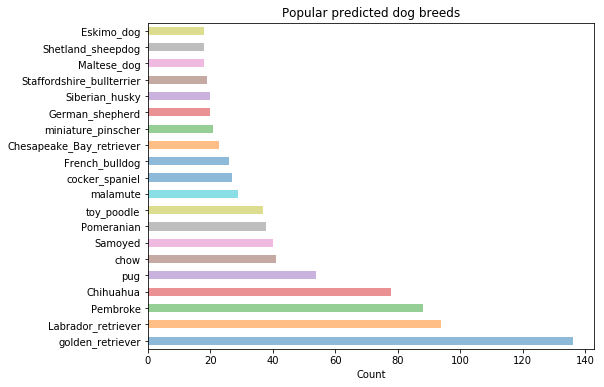

In [79]:
# Subset dog breeds by p1 column data and plot the data
dog_type = df_master.loc[df_master['p1_dog']==True, 'p1'].value_counts().head(20)

dog_type.plot(kind='barh',align = 'center', alpha=0.5, figsize = (8,6))
plt.title('Popular predicted dog breeds')
plt.xlabel('Count')
plt.savefig('Dog_breed', bbox_inches = 'tight')

### 2. Dog rating over time

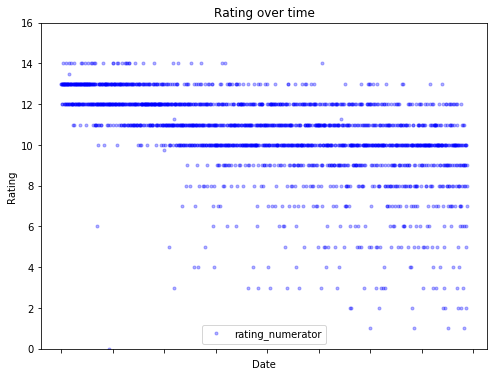

In [80]:
# Plot dog rating by 'rating numerator' column
df_master.plot(y='rating_numerator', ylim = [0,16], style = '.', alpha= .3, color = 'blue', figsize = (8,6))
plt.title('Rating over time')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.savefig('Rating')

### 3. Distribution of dog stages

In [81]:
# Subset the dog_stage column from master dataframe
dog_stage = df_master[['dog_stage']].dropna()
dog_stage['dog_stage'] = dog_stage['dog_stage'].astype(str)

In [82]:
# Create a dataframe counting number and percentage of dog stages available
a = dog_stage.groupby('dog_stage')['dog_stage'].agg(['count']).reset_index()
a['percentage'] = (a['count']*100)/(a['count'].sum())
a['percentage'] = a['percentage'].round(2)
a

,dog_stage,count,percentage
0,doggo,71,22.05
1,floofer,3,0.93
2,pupper,220,68.32
3,puppo,28,8.70


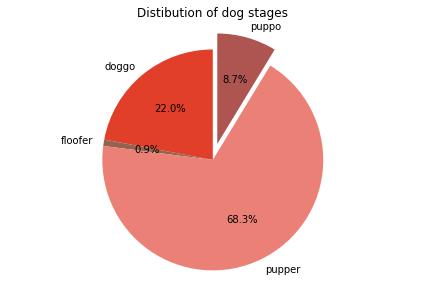

In [83]:
# Plot the data
colors = ["#E13F29", "#96624E", "#EB8076", "#AE5552"]
plt.pie(a['percentage'], labels=a['dog_stage'], shadow=False,
        colors = colors, explode=(0, 0, 0, 0.15),startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.title('Distibution of dog stages')
plt.savefig('Dog_stage', bbox_inches = 'tight')

### Compare Rating between dog stage and dog breeds

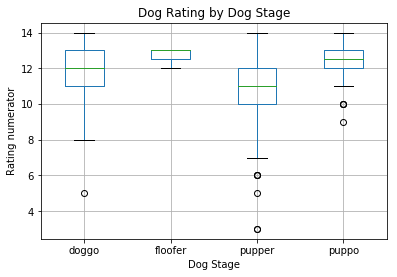

In [84]:
# Dog Rating on discrete dog stage
ax = df_master[(df_master['dog_stage']!='None')&(df_master['rating_numerator']<20)].boxplot(column = ['rating_numerator'], by = ['dog_stage'])
ax.get_figure().suptitle('')
plt.title('Dog Rating by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Rating numerator')
plt.savefig('dog_stage', bbox_inches = 'tight')

In [85]:
# Create the dataframe of top 15 most popular dog
Top15 = df_master.loc[df_master['p1_dog']==True, 'p1'].value_counts().head(15)
Top15 = df_master[df_master['p1'].isin(Top15.keys())].reset_index()
Top15 = Top15[['p1','rating_numerator','retweet_count','favorite_count']]

In [86]:
Top15.groupby('p1').describe()

favorite_count                                     \
                                  count          mean           std    min   
p1                                                                           
Chesapeake_Bay_retriever  23.0           10376.565217  16797.497673  168.0   
Chihuahua                 78.0           8698.384615   16306.887661  129.0   
French_bulldog            26.0           18347.846154  25057.434748  332.0   
German_shepherd           20.0           9952.100000   9116.100464   125.0   
Labrador_retriever        94.0           11640.329787  16976.491245  309.0   
Pembroke                  88.0           11303.636364  12268.209216  166.0   
Pomeranian                38.0           7984.236842   12300.494122  394.0   
Samoyed                   40.0           13310.425000  14030.005437  792.0   
chow                      41.0           9936.146341   12498.085975  437.0   
cocker_spaniel            27.0           11461.666667  12665.103367  295.0   
golden_retriever          136.0          12311.727941  13004.287902  191.0   
malamute                  29.0           8633.413793   8430.844046   223.0   
miniature_pinscher        21.0           8765.095238   10010.603827  109.0   
pug                       54.0           5809.462963   8158.294193   119.0   
toy_poodle                37.0           6635.486486   9375.785637   255.0   

                                                                \
                              25%      50%       75%       max   
p1                                                               
Chesapeake_Bay_retriever  2366.00  5632.0   10511.00  80089.0    
Chihuahua                 1269.25  2882.0   10404.25  123122.0   
French_bulldog            3240.75  10202.5  25001.75  124541.0   
German_shepherd           5256.25  7006.5   12677.25  36436.0    
Labrador_retriever        2226.50  5470.5   16028.00  128439.0   
Pembroke                  3159.25  6403.0   15126.25  69218.0    
Pomeranian                1893.00  3001.5   8701.25   65637.0    
Samoyed                   2824.75  7293.0   20404.50  53601.0    
chow                      3771.00  6738.0   11104.00  76451.0    
cocker_spaniel            2563.00  8301.0   15398.50  56462.0    
golden_retriever          3516.50  8121.5   16057.00  83504.0    
malamute                  2940.00  6870.0   10851.00  38766.0    
miniature_pinscher        2616.00  3791.0   9981.00   34213.0    
pug                       1636.50  2578.0   5692.50   36065.0    
toy_poodle                1367.00  4065.0   7532.00   48972.0    

                         rating_numerator              ...                  \
                                    count       mean   ...      75%    max   
p1                                                     ...                   
Chesapeake_Bay_retriever  23.0             10.782609   ...     12.0  13.0    
Chihuahua                 78.0             10.692308   ...     12.0  14.0    
French_bulldog            26.0             11.269231   ...     12.0  14.0    
German_shepherd           20.0             11.000000   ...     12.0  13.0    
Labrador_retriever        94.0             13.936170   ...     12.0  165.0   
Pembroke                  88.0             11.443182   ...     12.0  14.0    
Pomeranian                38.0             11.151316   ...     12.0  14.0    
Samoyed                   40.0             11.700000   ...     13.0  14.0    
chow                      41.0             11.609756   ...     12.0  13.0    
cocker_spaniel            27.0             11.296296   ...     12.0  13.0    
golden_retriever          136.0            12.290441   ...     12.0  99.0    
malamute                  29.0             10.896552   ...     12.0  13.0    
miniature_pinscher        21.0             10.666667   ...     12.0  12.0    
pug                       54.0             10.240741   ...     11.0  13.0    
toy_poodle                37.0             11.054054   ...     12.0  13.0    

                         r

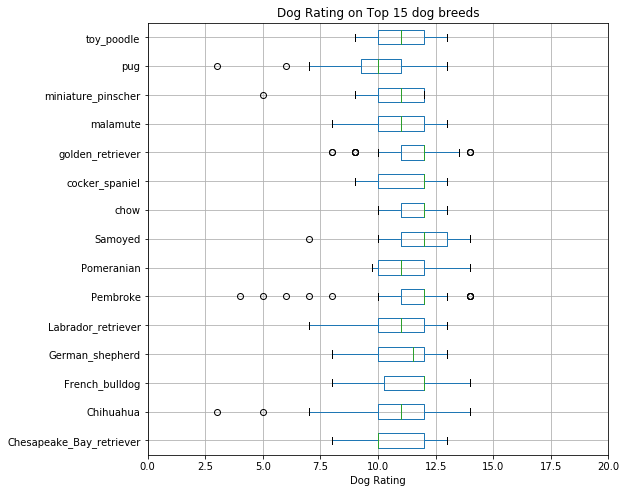

In [87]:
# Plot rating on Top 20 dog breeds
ax = Top15.boxplot(column = ['rating_numerator'], by = ['p1'], vert = False, figsize = (8,8))
ax.set_xlim(0,20)
ax.get_figure().suptitle('')
plt.title('Dog Rating on Top 15 dog breeds')
plt.xlabel('Dog Rating')
plt.savefig('Top15_rating', bbox_inches = 'tight')

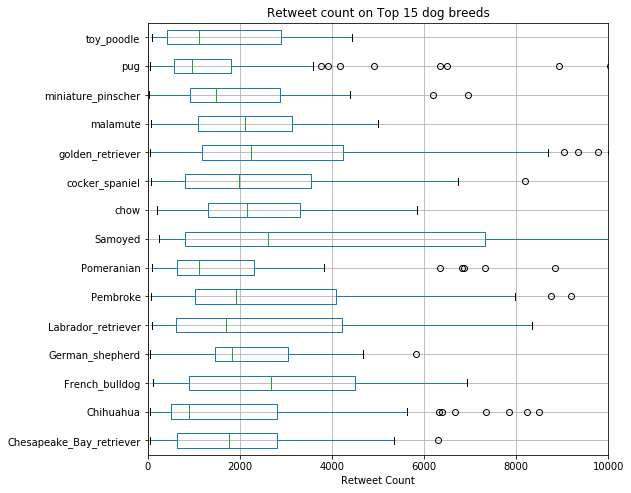

In [88]:
# plot retweet_count on Top 20 dog breeds
ax_1 = Top15.boxplot(column = ['retweet_count'], by = ['p1'], vert = False, figsize = (8,8))
ax_1.set_xlim(0,10000)
ax_1.get_figure().suptitle('')
plt.title('Retweet count on Top 15 dog breeds')
plt.xlabel('Retweet Count')
plt.savefig('Top15_retweet', bbox_inches = 'tight')

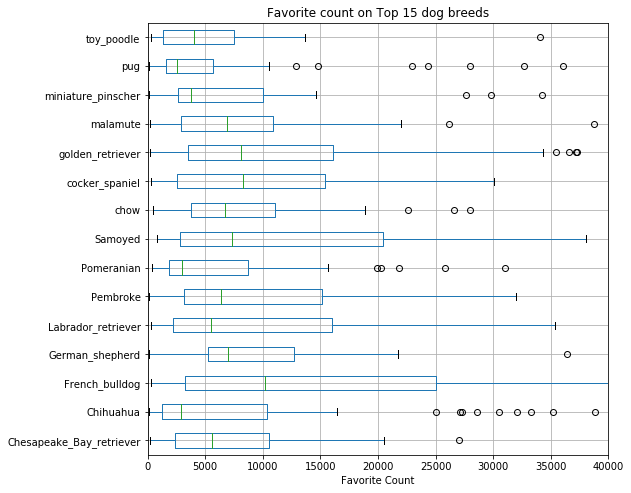

In [89]:
# plot favorite_count on Top 20 dog breeds
ax_2 = Top15.boxplot(column = ['favorite_count'], by = ['p1'], vert = False, figsize = (8,8))
ax_2.set_xlim(0,40000)
ax_2.get_figure().suptitle('')
plt.title('Favorite count on Top 15 dog breeds')
plt.xlabel('Favorite Count')
plt.savefig('Top15_favorite', bbox_inches = 'tight')